## Prepare Problem (เตรียมข้อมูล)
-Load Libraries

In [4]:
import numpy as np # for numerical computation 
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for built on top of matplotlib for data viz
import pandas as pd # for data manipulation, munging...
from sklearn.model_selection import train_test_split # for splitting data into train and test sets
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import classification_report # for classification report
from sklearn.metrics import accuracy_score # for evaluating model performance
from sklearn.linear_model import LogisticRegression # for logistic regression
from sklearn.tree import DecisionTreeClassifier # for decision tree
from sklearn.neighbors import KNeighborsClassifier # for k-nearest neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # for LDA
from sklearn.naive_bayes import GaussianNB # for Gaussian Naive Bayes
from sklearn.svm import SVC # for SVM

-Load Dataset

In [5]:
dataset = pd.read_csv('iris.csv')

## Summarize Data (สรุปข้อมูล)
-The dimension of the dataset (มิติของชุดข้อมูล)

In [6]:
print(dataset.shape)

(150, 5)


-Peek at the Data

In [7]:
dataset.head(5) # or print(dataset.head(5))

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


-Bottom of the Data

In [8]:
dataset.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


-Description

In [9]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


-Class Distribution(การแบ่งชั้นข้อมูล)

In [10]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Data Visualization (การสร้างภาพข้อมูล)
-Pair Plot

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


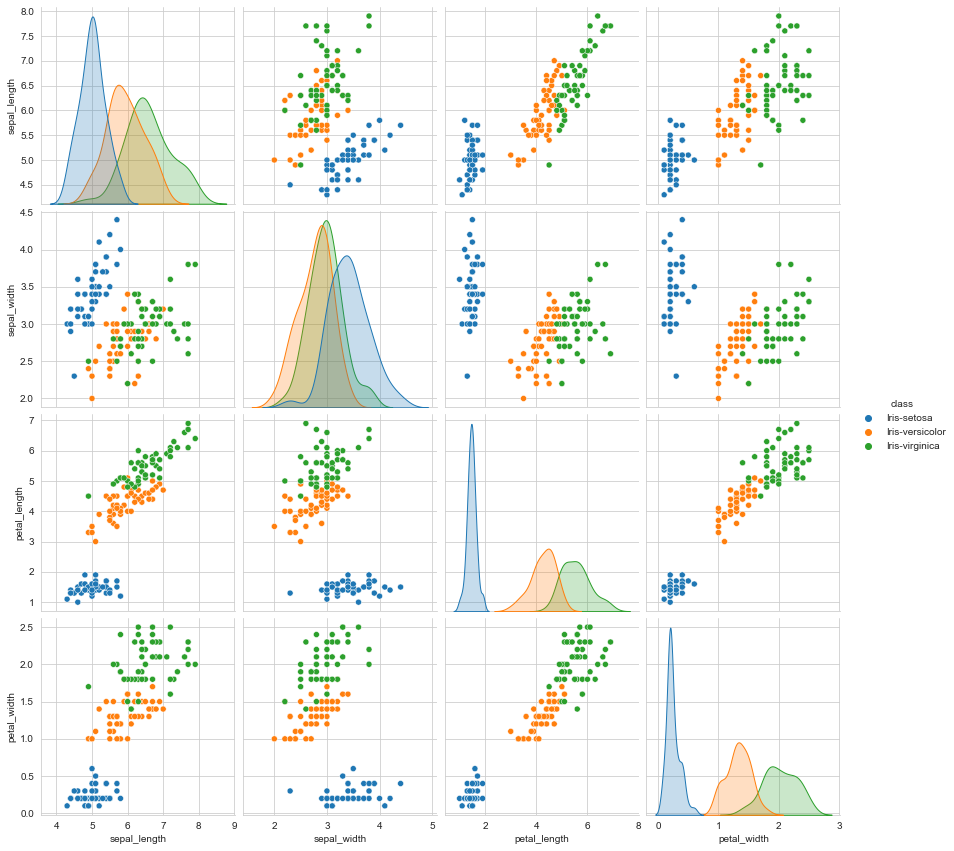

In [13]:
sns.set_style('whitegrid')
sns.pairplot(dataset,hue='class', size=3)

## Evaluate Some Algorithms (ประเมินบางอัลกอริทึม)
Steps to Evaluate Algorithms

    1.Separate out a validation dataset 
    2.Setup the test harness to use 10-fold cross-validation.
    3.Build 5 different models to predict species from flower 
    measurements.
    4.Select the best model

-Validation dataset

In [15]:
array = dataset.values
x = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, random_state=seed)

-Spot-Check Algorithms

In [23]:
models= []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean()*100.0, "(", cv_results.std()*100.0, ")")

C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

LR 98.33333333333331 ( 3.333333333333335 )
LDA 97.5 ( 3.818813079129868 )
KNN 98.33333333333331 ( 3.333333333333335 )
CART 97.5 ( 3.818813079129868 )
NB 97.5 ( 5.3359368645273735 )
SVM 98.33333333333331 ( 3.333333333333335 )


LR, KNN และ SVM เป็นอัลกอริทึมให้ค่า accurency ดีที่สุดในบรรดาทั้งหมด เลือก1อัลกอ เพื่อสร้างโมเดล

## Make predictions
-create a model

In [25]:
model = SVC()

-fit the model

In [26]:
model.fit(x_train, y_train)

SVC()

-make predictions

In [27]:
predictions = model.predict(x_test)

In [28]:
predictions

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [31]:
# accuracy of the model
print('accuracy_score is ',accuracy_score(y_test, predictions)*100)

accuracy_score is  86.66666666666667


-confusion matrix of the predicted result

In [32]:
from sklearn.metrics import confusion_matrix

In [34]:
print('confusion matrix is \n',confusion_matrix(y_test, predictions))

confusion matrix is 
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


-classification report

In [35]:
print('Classification report is \n',classification_report(y_test, predictions))

Classification report is 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



## Save the model for later use

In [36]:
# this code is inspired by jason brownlee
# import pickle
import pickle

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [37]:
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# use above model to predict or find score
results = loaded_model.score(x_test, y_test)
print(results)

0.8666666666666667
